<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_From%20regression%20to%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Regression to RNN

Learning objectives:
* [Objective 1] ARIMA
* [Objective 2] RNN requires a 3-D tensor as input
* [Objective 3] Stock data
* [Objective 4] Create the training and test data for RNN/LSTM
* [Objective 5] Run a simple RNN model
* [Objective 6] RNN/LTSM requires normalized input data
* [Objective 7] LSTM
* [Objective 8] LSTM Regularization
* [Objective 9] GRU
* [Objective 10] GRU Regularization

Note: Every run of the following code may vary.

## Ref:
- https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346

- https://github.com/dataman-git/codes_for_articles/blob/master/From%20regression%20to%20RNN.ipynb


In [271]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### [Learning Objective 1] ARIMA()

In [272]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

from statsmodels.tsa.arima_process import ArmaProcess

from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Generate the data
import numpy as np

np.random.seed(0)

ar= np.array([1, -0.8, 0.2])
ma= np.array([1])
my_simulation= ArmaProcess(ar, ma).generate_sample(nsample=100)

'''
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()
'''
my_simulation


array([ 1.76405235,  1.81139909,  2.07504678,  3.53865081,  4.28346928,
        1.74176738,  1.48680847,  0.68973609,  0.15120833,  0.39361794,
        0.42869626,  1.71850693,  2.05010401,  1.41805684,  1.1682879 ,
        0.98469328,  2.04817612,  1.23644397,  0.89258766, -0.38731441,
       -3.04135887, -1.70200562,  0.11110348, -0.31288112,  1.99722904,
        0.20599378, -0.18889227, -0.37949642,  1.26696053,  2.55882648,
        1.9486165 ,  1.42529043, -0.13727671, -2.37567592, -2.22099754,
       -1.14531388,  0.75823908,  2.03803389,  1.09145248,  0.16325245,
       -1.1362415 , -2.36166163, -3.36835119, -0.27157323, -0.05324053,
       -0.42635208, -1.58322892, -0.40382236, -1.62030995, -1.42822377,
       -1.71398359, -0.69863962, -0.72692011, -1.62244035, -1.18075049,
       -0.19178045,  0.14924296,  0.46022236, -0.2959928 , -0.69157988,
       -1.16652579, -1.15445782, -1.50340738, -2.69811694, -1.68038594,
       -1.2064663 , -2.2592942 , -1.10335984, -1.3381274 , -0.79

In [273]:
ArmaProcess??

The ARMA(p,q) process is described by

.. math::

$
        y_{t}=\phi_{1}y_{t-1}+\ldots+\phi_{p}y_{t-p}+\theta_{1}\epsilon_{t-1}
               +\ldots+\theta_{q}\epsilon_{t-q}+\epsilon_{t}
$

and the parameterization used in this function uses the lag-polynomial
    representation,

.. math::

$
        \left(1-\phi_{1}L-\ldots-\phi_{p}L^{p}\right)y_{t} =
            \left(1-\theta_{1}L-\ldots-\theta_{q}L^{q}\right)
$

### ry: 上面這式子(from官方文件)怪怪的，修改一下...

$
        \left(1-\phi_{1}L-\ldots-\phi_{p}L^{p}\right)y_{t} =
            \left(1+\theta_{1}L+\ldots+\theta_{q}L^{q}\right)\epsilon_{t}
$

(count    100.000000
 mean       0.138111
 std        1.510065
 min       -3.368351
 25%       -1.138510
 50%        0.075776
 75%        1.356861
 max        4.283469
 dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7fa23377d650>)

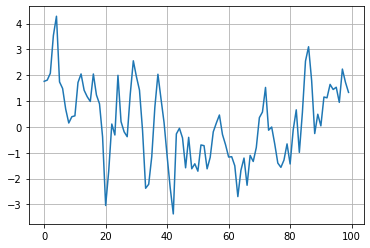

In [274]:
x= pd.Series(my_simulation)
x.describe(), x.plot(grid=True)

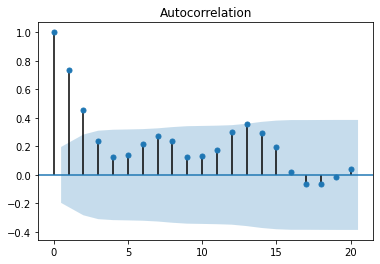

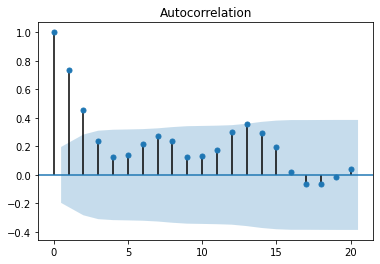

In [275]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)

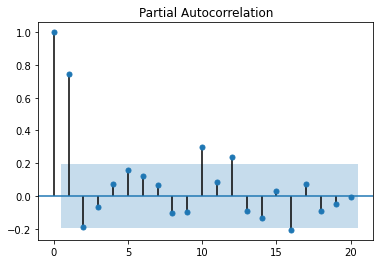

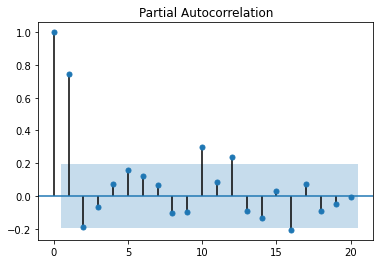

In [276]:
plot_pacf(my_simulation)

In [277]:
import warnings
import statsmodels.api as sm
from  statsmodels.tsa.arima_model import ARMA

#mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))

mod=   sm.tsa.ARIMA(my_simulation, order=(2, 0, 0))
#sm.tsa.ARIMA??


In [278]:

mod_fit= mod.fit()

mod_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 0)   Log Likelihood                -141.440
Method:                       css-mle   S.D. of innovations              0.991
Date:                Sun, 13 Jun 2021   AIC                            290.880
Time:                        05:54:27   BIC                            301.301
Sample:                             0   HQIC                           295.098
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1824      0.321      0.569      0.571      -0.446       0.811
ar.L1.y        0.8699      0.098      8.895      0.000       0.678       1.062
ar.L2.y       -0.1745      0.099     -1.768      0.080      -0.368       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7972           +0.0000j            1.7972            0.0000
AR.2            3.1896           +0.0000j            3.1896            0.0000
-----------------------------------------------------------------------------
"""

In [279]:
mod_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 301.3011
Dependent Variable: y                Log-Likelihood:      -141.44 
Date:               2021-06-13 05:54 Scale:               1.0000  
No. Observations:   100              Method:              css-mle 
Df Model:           3                Sample:              0       
Df Residuals:       97                                    0       
Converged:          1.0000           S.D. of innovations: 0.991   
No. Iterations:     6.0000           HQIC:                295.098 
AIC:                290.8804                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
const        0.1824     0.3208    0.5685   0.5710   -0.4464   0.8112
ar.L1.y      0.8699     0.0978    8.8953   0.0000    0.6783   1.0616
ar.L2.y     -0.1745     0.0987   -1.7675   0.0803   -0.3679   0.0190
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.7972             0.0000           1.7972             0.0000
AR.2          3.1896             0.0000           3.1896             0.0000
==================================================================

"""

### [Learning Objective 2] RNN requires a 3-D tensor as input
* Tensor: One tensor is a vector that enters the model
* Time Step: One time step is one observation in the tensor.
* Feature: One feature is one observation at a time step.

In [280]:
np.random.seed(0)

array = np.random.random(20) #.astype(np.float32
array.reshape((1,20,1))
array

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215])

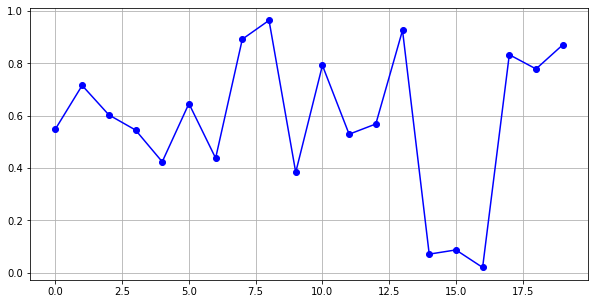

In [281]:
plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(array, linestyle='-', marker='o', color='b')
plt.grid(True)
plt.show()

In [282]:
array.reshape((4,5,1))

array([[[0.5488135 ],
        [0.71518937],
        [0.60276338],
        [0.54488318],
        [0.4236548 ]],

       [[0.64589411],
        [0.43758721],
        [0.891773  ],
        [0.96366276],
        [0.38344152]],

       [[0.79172504],
        [0.52889492],
        [0.56804456],
        [0.92559664],
        [0.07103606]],

       [[0.0871293 ],
        [0.0202184 ],
        [0.83261985],
        [0.77815675],
        [0.87001215]]])

In [283]:
array.reshape((2,5,2))

array([[[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        [0.43758721, 0.891773  ],
        [0.96366276, 0.38344152]],

       [[0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        [0.0202184 , 0.83261985],
        [0.77815675, 0.87001215]]])

In [284]:
np.random.seed(0)

# Example 1
array= np.random.random(20) #.astype(np.float32
x1=   array.reshape((1,20,1))
x1

array([[[0.5488135 ],
        [0.71518937],
        [0.60276338],
        [0.54488318],
        [0.4236548 ],
        [0.64589411],
        [0.43758721],
        [0.891773  ],
        [0.96366276],
        [0.38344152],
        [0.79172504],
        [0.52889492],
        [0.56804456],
        [0.92559664],
        [0.07103606],
        [0.0871293 ],
        [0.0202184 ],
        [0.83261985],
        [0.77815675],
        [0.87001215]]])

In [285]:

# Example 2
x2= array.reshape((4,5,1))
x2

array([[[0.5488135 ],
        [0.71518937],
        [0.60276338],
        [0.54488318],
        [0.4236548 ]],

       [[0.64589411],
        [0.43758721],
        [0.891773  ],
        [0.96366276],
        [0.38344152]],

       [[0.79172504],
        [0.52889492],
        [0.56804456],
        [0.92559664],
        [0.07103606]],

       [[0.0871293 ],
        [0.0202184 ],
        [0.83261985],
        [0.77815675],
        [0.87001215]]])

In [286]:

# Example 3
x3= array.reshape((2,5,2))
x3

array([[[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        [0.43758721, 0.891773  ],
        [0.96366276, 0.38344152]],

       [[0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        [0.0202184 , 0.83261985],
        [0.77815675, 0.87001215]]])

* use numpy to store and manipulate image data. 
* We will use the Python Imaging library (PIL) to read and write data to standard file formats.
* 4 lines of pixels, each line of pixels contains 5 pixels, and each pixel contains 3 bytes (red, green, blue)
* The shape of the array is: height x width x 3.

In [287]:
#np.random.randint?

In [288]:
np.random.seed(0)

# IF it is image data:
# Create an RGB image that is 3 dimensional arrays of 8-bit unsigned integers.
width= 5
height= 4
RGB= 3
p= width * height * RGB
img_data= np.random.randint(low=100, high=256, size=p, dtype= np.uint8) # Generate values in (100,255)
img_data= img_data.reshape((height, width, RGB))
img_data

array([[[110, 227, 240],
        [147, 251, 217],
        [122, 133, 167],
        [178, 254, 182],
        [218, 225, 239]],

       [[203, 225, 109],
        [216, 208, 121],
        [181, 189, 202],
        [198, 136, 105],
        [212, 187, 158]],

       [[143, 176, 170],
        [160, 175, 232],
        [114, 188, 254],
        [240, 169, 158],
        [157, 141, 198]],

       [[166, 172, 222],
        [225, 139, 174],
        [187, 201, 235],
        [222, 188, 194],
        [207, 245, 181]]], dtype=uint8)

In [289]:
# this cell has no effect in Colab, need debugging ...
from PIL import Image
img= Image.fromarray(img_data)
img.show()


In [290]:
#
# 尚未成功
#

# for google colab use cv2_imshow instead
# change x, y, h ,w to the values you are happy with
#import cv2_imshow
#img = cv2.imread("lenna.png")
#crop_img = img[y:y+h, x:x+w]
#cv2_imshow(img)
#cv2.waitKey(0)

#import cv2 as cv 
#from google.colab.patches import cv2_imshow # for image display
#from PIL import Image
#cv2_imshow(img)



### [Learning Objective 3] Stock data

In [291]:
try:
  import yfinance as yf
except:
  !pip install yfinance

try:
  from yahoofinancials import YahooFinancials
except:
  !pip install yahoofinancials
  

In [292]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
AMZN= yf.download( '^gspc', #'AMZN', 
          start= '1991-01-01',#'2013-01-01', 
          end=  '2021-01-01',#'2019-12-31', 
          progress=False)
# AMZN = yf.download('AMZN') for all 
all_data= AMZN[['Adj Close',
        'Open', 
        'High', 
        'Low', 
        'Close', 
        'Volume']].round(2)
all_data


,Adj Close,Open,High,Low,Close,Volume
Date,,,,,,
1991-01-02,326.45,330.20,330.75,326.45,326.45,126280000
1991-01-03,321.91,326.46,326.53,321.90,321.91,141450000
1991-01-04,321.00,321.91,322.35,318.87,321.00,140820000
1991-01-07,315.44,320.97,320.97,315.44,315.44,130610000
1991-01-08,314.90,315.44,316.97,313.79,314.90,143390000
...,...,...,...,...,...,...
2020-12-24,3703.06,3694.03,3703.82,3689.32,3703.06,1885090000
2020-12-28,3735.36,3723.03,3740.51,3723.03,3735.36,3527460000
2020-12-29,3727.04,3750.01,3756.12,3723.31,3727.04,3387030000


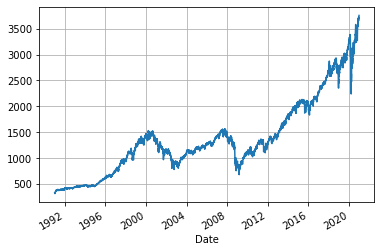

In [293]:
all_data['Adj Close'].plot(grid=True)

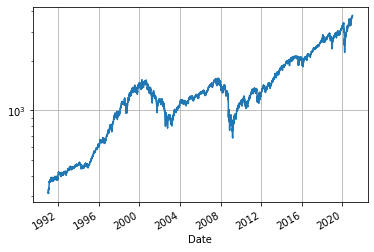

In [294]:
all_data['Adj Close'].plot(grid=True,logy=True)

(7054, 505)

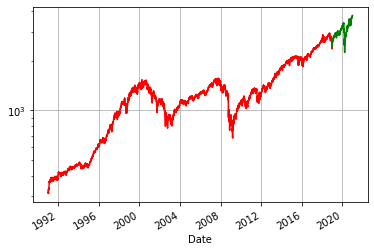

In [321]:
tr_data= all_data['Close'][:'2018']
ts_data= all_data['Close']['2019':]
tr_data.plot(c='r')
ts_data.plot(c='g', grid=True, logy=True)
tr_data.size, ts_data.size 

In [322]:
tr_days= (tr_data.index[-1]-tr_data.index[0]).days
ts_days= (ts_data.index[-1]-ts_data.index[0]).days

tr_years= tr_days/365
ts_years= ts_days/365
tr_days, ts_days, tr_years, ts_years

(10225, 729, 28.013698630136986, 1.9972602739726026)

In [297]:
print(f"{tr_data.size} data points in the training data")
print(f"{ts_data.size} data points in the test data")



7054 data points in the training data
505 data points in the test data


## [Learning objective 4] Create the training and test data for RNN/LSTM

In [324]:
all_data[:'2018'].iloc[:,0:1].values

array([[ 326.45],
       [ 321.91],
       [ 321.  ],
       ...,
       [2488.83],
       [2485.74],
       [2506.85]])

In [329]:
tr_data.values.reshape(-1,1)

array([[ 326.45],
       [ 321.91],
       [ 321.  ],
       ...,
       [2488.83],
       [2485.74],
       [2506.85]])

In [334]:
def ts_train_test( #all_data, 
          time_steps= 10, 
          for_periods= 2):
    '''
    input: 
      data: dataframe with dates and price data
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    #ts_train = all_data[:'2018'].iloc[:,0:1].values
    #ts_test  = all_data['2019':].iloc[:,0:1].values

    ts_train= tr_data.values.reshape(-1,1)
    ts_test=  ts_data.values.reshape(-1,1)

    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # create training data of s samples and t time steps
    X_train = []
    y_train = []
    y_train_stacked = []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train[i-time_steps:i,0])
        y_train.append(ts_train[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train= np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    #inputs= pd.concat((all_data["Adj Close"][:'2018'], 
    #          all_data["Adj Close"]['2019':]),
    #        axis=0).values
    
    inputs= pd.concat((tr_data, 
              ts_data),
            axis=0).values

    inputs= inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs= inputs.reshape(-1,1)

    # Preparing X_test
    X_test= []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test= np.array(X_test)
    X_test= np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test

X_train, y_train, X_test= ts_train_test() #all_data, 5, 2)
X_train.shape, y_train.shape, X_test.shape

((7043, 10, 1), (7043, 2), (503, 10, 1))

In [335]:
# Make the 3-D shape to a data frame so we can see: 
X_train_see= pd.DataFrame(np.reshape(X_train, 
                   X_train.shape[0:2] #(X_train.shape[0],X_train.shape[1])
                   ))
y_train_see= pd.DataFrame(y_train)
pd.concat([X_train_see,y_train_see], axis=1)

,0,1,2,3,4,5,6,7,8,9,0,1
0,326.45,321.91,321.00,315.44,314.90,311.49,314.53,315.23,312.49,313.73,316.17,327.97
1,321.91,321.00,315.44,314.90,311.49,314.53,315.23,312.49,313.73,316.17,327.97,332.23
2,321.00,315.44,314.90,311.49,314.53,315.23,312.49,313.73,316.17,327.97,332.23,331.06
3,315.44,314.90,311.49,314.53,315.23,312.49,313.73,316.17,327.97,332.23,331.06,328.31
4,314.90,311.49,314.53,315.23,312.49,313.73,316.17,327.97,332.23,331.06,328.31,330.21
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2633.08,2637.72,2636.78,2651.07,2650.54,2599.95,2545.94,2546.16,2506.96,2467.42,2416.62,2351.10
7039,2637.72,2636.78,2651.07,2650.54,2599.95,2545.94,2546.16,2506.96,2467.42,2416.62,2351.10,2467.70
7040,2636.78,2651.07,2650.54,2599.95,2545.94,2546.16,2506.96,2467.42,2416.62,2351.10,2467.70,2488.83
7041,2651.07,2650.54,2599.95,2545.94,2546.16,2506.96,2467.42,2416.62,2351.10,2467.70,2488.83,2485.74


In [300]:
# Make the 3-D shape to a data frame so we can see: 
X_test_see= pd.DataFrame(np.reshape(X_test, 
                  X_test.shape[0:2] #(X_test.shape[0],X_test.shape[1])
                  ))
pd.DataFrame(X_test_see)

,0,1,2,3,4
0,2351.10,2467.70,2488.83,2485.74,2506.85
1,2467.70,2488.83,2485.74,2506.85,2510.03
2,2488.83,2485.74,2506.85,2510.03,2447.89
3,2485.74,2506.85,2510.03,2447.89,2531.94
4,2506.85,2510.03,2447.89,2531.94,2549.69
...,...,...,...,...,...
498,3694.62,3701.17,3722.48,3709.41,3694.92
499,3701.17,3722.48,3709.41,3694.92,3687.26
500,3722.48,3709.41,3694.92,3687.26,3690.01
501,3709.41,3694.92,3687.26,3690.01,3703.06


In [301]:
print(f"{X_train.shape} samples in the training data")
print(f"{y_train.shape} samples in the training label")
print(f"{X_test.shape} samples in the test data")

(7048, 5, 1) samples in the training data
(7048, 2) samples in the training label
(503, 5, 1) samples in the test data


## [Learning objective 5] Run a simple RNN model

In [302]:
def simple_rnn_model(X_train, y_train, X_test):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', 
               loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, 
            epochs=100, 
            batch_size=150, 
            verbose=0)

    # Finalizing predictions
    rnn_predictions= my_rnn_model.predict(X_test)

    return my_rnn_model, rnn_predictions

(my_rnn_model, 
rnn_predictions)= simple_rnn_model(X_train, y_train, X_test)

my_rnn_model, rnn_predictions

(<keras.engine.sequential.Sequential at 0x7fa2518e47d0>,
 array([[160.64676, 158.16672],
        [160.64676, 158.16672],
        [160.64676, 158.16672],
        ...,
        [160.64676, 158.16672],
        [160.64676, 158.16672],
        [160.64676, 158.16672]], dtype=float32))

(8538382.0,                real        pred
 Date                           
 2019-01-04  2531.94  160.646759
 2019-01-07  2549.69  160.646759
 2019-01-08  2574.41  160.646759
 2019-01-09  2584.96  160.646759
 2019-01-10  2596.64  160.646759
 ...             ...         ...
 2020-12-24  3703.06  160.646759
 2020-12-28  3735.36  160.646759
 2020-12-29  3727.04  160.646759
 2020-12-30  3732.04  160.646759
 2020-12-31  3756.07  160.646759
 
 [503 rows x 2 columns])

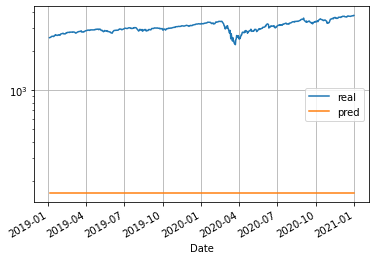

In [303]:
def actual_pred_plot(preds):
    actual_pred= pd.DataFrame()#columns= ['Adj. Close', 'prediction'])
    actual_pred['real']= ts_data[-len(preds):] #all_data.loc['2019':,'Adj Close'][0:len(preds)]
    actual_pred['pred']= preds[:,0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['real']),
            np.array(actual_pred['pred']))
    actual_pred.plot(grid=True, logy=True)
    return (m.result().numpy(), actual_pred)
    
actual_pred_plot(rnn_predictions)  

## [Learning objective 6] RNN/LTSM requires normalized input data

In [337]:
def ts_train_test_normalize(all_data, 
               time_steps=20, 
               for_periods=2):
    '''
    input: 
      data: dataframe with dates and price data
      time_steps: 向後回朔日期
      for_periods: 向前預測日期
    output:
      X_train, y_train: data from 2013/1/1-2018/12/31
      X_test:  data from 2019 -
      sc:      insantiated MinMaxScaler object fit to the training data
    '''
    # create training and test set
    #ts_train =  all_data[:'2018'].iloc[:,0:1].values #tr_data.values #
    #ts_test  =  all_data['2019':].iloc[:,0:1].values #ts_data.values #
    
    ts_train= tr_data.values.reshape(-1,1)
    ts_test=  ts_data.values.reshape(-1,1)

    ts_train_len = len(ts_train)
    ts_test_len = len(ts_test)

    # scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc= MinMaxScaler(feature_range=(0,1))

    ts_train_scaled= sc.fit_transform(ts_train)

    # create training data of s samples and t time steps
    X_train= []
    y_train= []
    y_train_stacked= []
    for i in range(time_steps,ts_train_len-1): 
        X_train.append(ts_train_scaled[i-time_steps:i,0])
        y_train.append(ts_train_scaled[i:i+for_periods,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping X_train for efficient modelling
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

    #inputs = pd.concat((all_data["Adj Close"][:'2018'], #ts_train, #
    #           all_data["Adj Close"]['2019':] #ts_test  #
    #           ),axis=0).values
    
    inputs= pd.concat((tr_data, 
              ts_data),
            axis=0).values

    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)

    # Preparing X_test
    X_test = []
    for i in range(time_steps,ts_test_len+time_steps-for_periods):
        X_test.append(inputs[i-time_steps:i,0])
        
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    return X_train, y_train , X_test, sc

X_train, y_train, X_test, sc = ts_train_test_normalize(all_data)


(array([[2477.2168, 2465.7192],
        [2481.9788, 2473.1294],
        [2416.865 , 2409.9893],
        ...,
        [3526.0518, 3501.7952],
        [3536.8335, 3512.163 ],
        [3565.3997, 3541.2397]], dtype=float32),
 (13003.958,                real         pred
  Date                            
  2019-01-04  2531.94  2477.216797
  2019-01-07  2549.69  2481.978760
  2019-01-08  2574.41  2416.864990
  2019-01-09  2584.96  2505.989014
  2019-01-10  2596.64  2518.008789
  ...             ...          ...
  2020-12-24  3703.06  3526.867188
  2020-12-28  3735.36  3523.371582
  2020-12-29  3727.04  3526.051758
  2020-12-30  3732.04  3536.833496
  2020-12-31  3756.07  3565.399658
  
  [503 rows x 2 columns]))

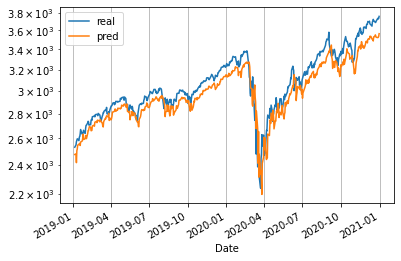

In [338]:

def simple_rnn_model(X_train, y_train, X_test, sc):
    '''
    create single layer rnn model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN
    
    my_rnn_model = Sequential()
    my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    #my_rnn_model.add(SimpleRNN(32, return_sequences=True))
    my_rnn_model.add(SimpleRNN(32))
    my_rnn_model.add(Dense(2)) # The time step of the output

    my_rnn_model.compile(optimizer='rmsprop', loss='mean_squared_error')

    # fit the RNN model
    my_rnn_model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=0)

    # Finalizing predictions
    rnn_predictions = my_rnn_model.predict(X_test)
    from sklearn.preprocessing import MinMaxScaler
    rnn_predictions = sc.inverse_transform(rnn_predictions)

    return my_rnn_model, rnn_predictions


my_rnn_model, rnn_predictions_2= simple_rnn_model(X_train, y_train, X_test, sc)
rnn_predictions_2, actual_pred_plot(rnn_predictions_2)



## [Learning objective 7] LSTM

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(34169.19,                real         pred
 Date                            
 2019-01-04  2531.94  2552.063477
 2019-01-07  2549.69  2540.569824
 2019-01-08  2574.41  2528.628662
 2019-01-09  2584.96  2520.850830
 2019-01-10  2596.64  2515.195557
 ...             ...          ...
 2020-12-24  3703.06  3384.498291
 2020-12-28  3735.36  3387.192383
 2020-12-29  3727.04  3388.815674
 2020-12-30  3732.04  3390.545166
 2020-12-31  3756.07  3392.611084
 
 [503 rows x 2 columns])

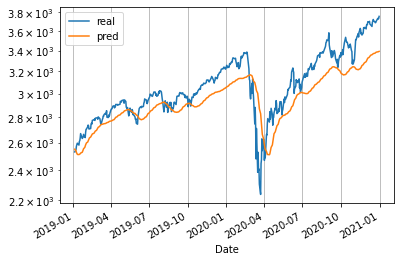

In [339]:
def LSTM_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction = LSTM_model(X_train, y_train, X_test, sc)
LSTM_prediction[1:10]
actual_pred_plot(LSTM_prediction)   

## [Learning objective 8] LSTM Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(array([[2431.1716, 2435.4858],
        [2465.7136, 2469.557 ],
        [2468.862 , 2472.2122],
        ...,
        [3419.9104, 3448.9976],
        [3415.107 , 3444.2683],
        [3415.11  , 3444.7466]], dtype=float32),
 (27983.549,                real         pred
  Date                            
  2019-01-04  2531.94  2431.171631
  2019-01-07  2549.69  2465.713623
  2019-01-08  2574.41  2468.862061
  2019-01-09  2584.96  2471.435303
  2019-01-10  2596.64  2479.404785
  ...             ...          ...
  2020-12-24  3703.06  3420.304199
  2020-12-28  3735.36  3421.060547
  2020-12-29  3727.04  3419.910400
  2020-12-30  3732.04  3415.106934
  2020-12-31  3756.07  3415.110107
  
  [503 rows x 2 columns]))

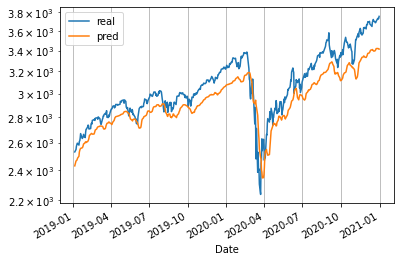

In [307]:
def LSTM_model_regularization(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD
    
    # The LSTM architecture
    my_LSTM_model = Sequential()
    my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_LSTM_model.add(LSTM(units=50, activation='tanh'))
    my_LSTM_model.add(Dense(units=2))

    # Compiling
    my_LSTM_model.compile(optimizer=SGD(lr=0.01, 
                      decay=1e-7, 
                      momentum=0.9, 
                      nesterov=False),
               loss='mean_squared_error')
    # Fitting to the training set
    my_LSTM_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    LSTM_prediction = my_LSTM_model.predict(X_test)
    LSTM_prediction = sc.inverse_transform(LSTM_prediction)

    return my_LSTM_model, LSTM_prediction

my_LSTM_model, LSTM_prediction= LSTM_model_regularization(X_train, y_train, X_test, sc)
LSTM_prediction, actual_pred_plot(LSTM_prediction)  

## [Learning objective 9] GRU

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(array([[2462.542 , 2459.878 ],
        [2482.7942, 2481.346 ],
        [2474.5098, 2474.5327],
        ...,
        [3556.5764, 3551.1365],
        [3555.6704, 3549.7246],
        [3563.8523, 3557.0442]], dtype=float32),
 (11981.919,                real         pred
  Date                            
  2019-01-04  2531.94  2462.541992
  2019-01-07  2549.69  2482.794189
  2019-01-08  2574.41  2474.509766
  2019-01-09  2584.96  2482.436768
  2019-01-10  2596.64  2498.042236
  ...             ...          ...
  2020-12-24  3703.06  3564.083008
  2020-12-28  3735.36  3560.117432
  2020-12-29  3727.04  3556.576416
  2020-12-30  3732.04  3555.670410
  2020-12-31  3756.07  3563.852295
  
  [503 rows x 2 columns]))

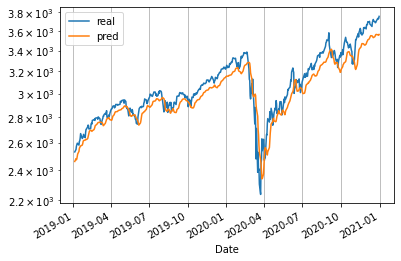

In [308]:
def GRU_model(X_train, y_train, X_test, sc):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    #my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dense(units=2))

    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_prediction = my_GRU_model.predict(X_test)
    GRU_prediction = sc.inverse_transform(GRU_prediction)

    return my_GRU_model, GRU_prediction

my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test, sc)
GRU_prediction, actual_pred_plot(GRU_prediction)  

## [Learning objective 10] GRU Regularization

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(11981.919,                real         pred
 Date                            
 2019-01-04  2531.94  2462.541992
 2019-01-07  2549.69  2482.794189
 2019-01-08  2574.41  2474.509766
 2019-01-09  2584.96  2482.436768
 2019-01-10  2596.64  2498.042236
 ...             ...          ...
 2020-12-24  3703.06  3564.083008
 2020-12-28  3735.36  3560.117432
 2020-12-29  3727.04  3556.576416
 2020-12-30  3732.04  3555.670410
 2020-12-31  3756.07  3563.852295
 
 [503 rows x 2 columns])

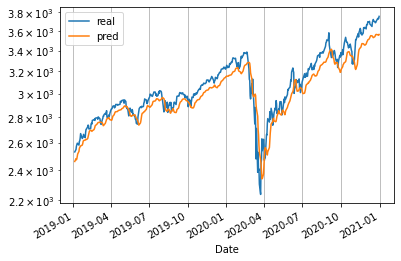

In [309]:
def GRU_model_regularization(X_train, y_train, X_test, sc):
    '''
    create GRU model trained on X_train and y_train
    and make predictions on the X_test data
    '''
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU
    from keras.optimizers import SGD
    from keras.layers import Dropout
    
    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer with Dropout regularisation
    my_GRU_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Second GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    
    # Third GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # Fourth GRU layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    my_GRU_model.add(Dropout(0.2))
    # The output layer
    my_GRU_model.add(Dense(units=1))
    # Compiling the RNN
    my_GRU_model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,y_train,epochs=50,batch_size=150, verbose=0)

    GRU_predictions = my_GRU_model.predict(X_test)
    GRU_predictions = sc.inverse_transform(GRU_predictions)

    return my_GRU_model, GRU_predictions

my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, y_train, X_test, sc)
GRU_predictions
actual_pred_plot(GRU_prediction)  

In [310]:
preds= rnn_predictions_2

x= pd.DataFrame()#columns= ['Adj. Close', 'prediction'])
x['real']= ts_data[-len(preds):] #all_data.loc['2019':,'Adj Close'][0:len(preds)]
x['rnn']= preds[:,0]

x['lstm']= LSTM_prediction[:,0]
x['gru']= GRU_prediction[:,0]

x

,real,rnn,lstm,gru
Date,,,,
2019-01-04,2531.94,2444.349121,2431.171631,2462.541992
2019-01-07,2549.69,2474.379395,2465.713623,2482.794189
2019-01-08,2574.41,2396.443115,2468.862061,2474.509766
2019-01-09,2584.96,2501.575684,2471.435303,2482.436768
2019-01-10,2596.64,2542.041992,2479.404785,2498.042236
...,...,...,...,...
2020-12-24,3703.06,3536.054443,3420.304199,3564.083008
2020-12-28,3735.36,3536.491943,3421.060547,3560.117432
2020-12-29,3727.04,3547.233643,3419.910400,3556.576416


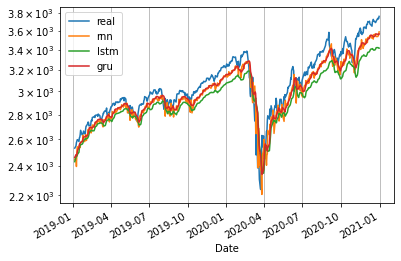

In [311]:
x.plot(grid=True,logy=True)

In [312]:
x.corr()

,real,rnn,lstm,gru
real,1.000000,0.969063,0.951328,0.960954
rnn,0.969063,1.000000,0.979070,0.987284
lstm,0.951328,0.979070,1.000000,0.997866
gru,0.960954,0.987284,0.997866,1.000000


In [313]:
# 如果不用 RNN/LSTM/GRU，只用 moving average 呢？
x

,real,rnn,lstm,gru
Date,,,,
2019-01-04,2531.94,2444.349121,2431.171631,2462.541992
2019-01-07,2549.69,2474.379395,2465.713623,2482.794189
2019-01-08,2574.41,2396.443115,2468.862061,2474.509766
2019-01-09,2584.96,2501.575684,2471.435303,2482.436768
2019-01-10,2596.64,2542.041992,2479.404785,2498.042236
...,...,...,...,...
2020-12-24,3703.06,3536.054443,3420.304199,3564.083008
2020-12-28,3735.36,3536.491943,3421.060547,3560.117432
2020-12-29,3727.04,3547.233643,3419.910400,3556.576416


In [314]:
for w in [10, 20, 50, 100]:
  x[f'ma{w}']=x['real'].rolling(window=w).mean()
x

,real,rnn,lstm,gru,ma10,ma20,ma50,ma100
Date,,,,,,,,
2019-01-04,2531.94,2444.349121,2431.171631,2462.541992,NaN,NaN,NaN,NaN
2019-01-07,2549.69,2474.379395,2465.713623,2482.794189,NaN,NaN,NaN,NaN
2019-01-08,2574.41,2396.443115,2468.862061,2474.509766,NaN,NaN,NaN,NaN
2019-01-09,2584.96,2501.575684,2471.435303,2482.436768,NaN,NaN,NaN,NaN
2019-01-10,2596.64,2542.041992,2479.404785,2498.042236,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-24,3703.06,3536.054443,3420.304199,3564.083008,3691.388,3680.3145,3563.2108,3478.3820
2020-12-28,3735.36,3536.491943,3421.060547,3560.117432,3698.578,3685.1650,3568.2512,3482.4579
2020-12-29,3727.04,3547.233643,3419.910400,3556.576416,3706.533,3690.4355,3573.1158,3486.2367


In [315]:
x.corr()

,real,rnn,lstm,gru,ma10,ma20,ma50,ma100
real,1.000000,0.969063,0.951328,0.960954,0.970436,0.924500,0.794824,0.653097
rnn,0.969063,1.000000,0.979070,0.987284,0.986311,0.952923,0.818177,0.661793
lstm,0.951328,0.979070,1.000000,0.997866,0.995055,0.975896,0.841924,0.674342
gru,0.960954,0.987284,0.997866,1.000000,0.996835,0.972591,0.841835,0.681981
ma10,0.970436,0.986311,0.995055,0.996835,1.000000,0.978998,0.855552,0.700174
ma20,0.924500,0.952923,0.975896,0.972591,0.978998,1.000000,0.912960,0.749102
ma50,0.794824,0.818177,0.841924,0.841835,0.855552,0.912960,1.000000,0.877588
ma100,0.653097,0.661793,0.674342,0.681981,0.700174,0.749102,0.877588,1.000000


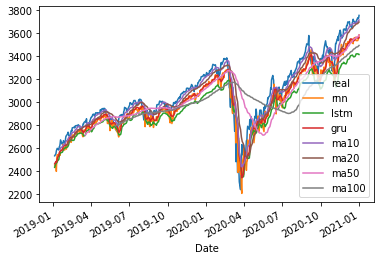

In [316]:
x.plot()

In [317]:
for w in [10, 20, 50, 100]:
  x[f'mC{w}']=x['real'].rolling(window=w, center=True).mean()
x.corr()


,real,rnn,lstm,gru,ma10,ma20,ma50,ma100,mC10,mC20,mC50,mC100
real,1.000000,0.969063,0.951328,0.960954,0.970436,0.924500,0.794824,0.653097,0.990788,0.982726,0.926622,0.792111
rnn,0.969063,1.000000,0.979070,0.987284,0.986311,0.952923,0.818177,0.661793,0.980956,0.974825,0.919008,0.779765
lstm,0.951328,0.979070,1.000000,0.997866,0.995055,0.975896,0.841924,0.674342,0.969213,0.969695,0.921266,0.778800
gru,0.960954,0.987284,0.997866,1.000000,0.996835,0.972591,0.841835,0.681981,0.978653,0.976675,0.926840,0.787868
ma10,0.970436,0.986311,0.995055,0.996835,1.000000,0.978998,0.855552,0.700174,0.983797,0.984220,0.940480,0.805473
ma20,0.924500,0.952923,0.975896,0.972591,0.978998,1.000000,0.912960,0.749102,0.940702,0.948095,0.939000,0.817750
ma50,0.794824,0.818177,0.841924,0.841835,0.855552,0.912960,1.000000,0.877588,0.805726,0.811040,0.831845,0.823437
ma100,0.653097,0.661793,0.674342,0.681981,0.700174,0.749102,0.877588,1.000000,0.651108,0.641293,0.612901,0.559698
mC10,0.990788,0.980956,0.969213,0.978653,0.983797,0.940702,0.805726,0.651108,1.000000,0.995847,0.947297,0.814020
mC20,0.982726,0.974825,0.969695,0.976675,0.984220,0.948095,0.811040,0.641293,0.995847,1.000000,0.967543,0.838025


In [318]:
x.corr()['real'].sort_values(ascending=False)


real     1.000000
mC10     0.990788
mC20     0.982726
ma10     0.970436
rnn      0.969063
gru      0.960954
lstm     0.951328
mC50     0.926622
ma20     0.924500
ma50     0.794824
mC100    0.792111
ma100    0.653097
Name: real, dtype: float64

In [319]:
'''
real     1.000000
mC10     0.990788
mC20     0.982726
ma10     0.970436
rnn      0.969485
gru      0.960465
lstm     0.952220
mC50     0.926622
ma20     0.924500
ma50     0.794824
mC100    0.792111
ma100    0.653097
Name: real, dtype: float64
'''
# 與 'real' 的相關係數最高的前3名分別為 mC10, mC20, ma10
# 'rnn', 'gru', 'lstm' 排在其後
# 那麼 若用 x.corr() 來衡量 演算法達成效果的優缺點，
# 這些 deep learning 優於傳統方法之處在哪裡？ 

'\nreal     1.000000\nmC10     0.990788\nmC20     0.982726\nma10     0.970436\nrnn      0.969485\ngru      0.960465\nlstm     0.952220\nmC50     0.926622\nma20     0.924500\nma50     0.794824\nmC100    0.792111\nma100    0.653097\nName: real, dtype: float64\n'